In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
%matplotlib inline

In [5]:
train_dir=r'F:\vscode\New folder\dataset\train'
test_dir=r'F:\vscode\New folder\dataset\test'
CATEGORIES=['NP','P']
training_data=[]
img_size=200
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(train_dir,category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            

create_training_data()

print(len(training_data))

2698


In [6]:
testing_data=[]

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(test_dir,category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (img_size, img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
            

create_testing_data()

print(len(testing_data))

600


In [7]:
import random
random.shuffle(training_data)
random.shuffle(testing_data)

In [8]:
X_train=[]
y_train=[]
X_test=[]
y_test=[]
def train_test_split():
    for features,label in training_data:
        X_train.append(features)
        y_train.append(label)
        
        
    for feature,labels in testing_data:
        X_test.append(feature)
        y_test.append(labels)
        
        
train_test_split()
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2698
2698
600
600


In [9]:
X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2698, 200, 200, 3)
(2698,)
(600, 200, 200, 3)
(600,)


In [10]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_size,img_size,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 198, 198, 32)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
activation_13 (Activation)   (None, 97, 97, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 97, 97, 64)       

In [69]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.001)

In [36]:
history = model.fit(x=X_train,y=y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test),callbacks=[reduce_lr])

Epoch 1/10
104/104 [==============================] - 290s 3s/step - loss: 0.6186 - accuracy: 0.7231 - val_loss: 0.9051 - val_accuracy: 0.5200
Epoch 2/10
104/104 [==============================] - 289s 3s/step - loss: 0.4088 - accuracy: 0.8223 - val_loss: 0.5333 - val_accuracy: 0.7617
Epoch 3/10
104/104 [==============================] - 286s 3s/step - loss: 0.2933 - accuracy: 0.8751 - val_loss: 0.2374 - val_accuracy: 0.9250
Epoch 4/10
104/104 [==============================] - 286s 3s/step - loss: 0.2620 - accuracy: 0.8944 - val_loss: 0.1535 - val_accuracy: 0.9433
Epoch 5/10
104/104 [==============================] - 292s 3s/step - loss: 0.2076 - accuracy: 0.9155 - val_loss: 0.2240 - val_accuracy: 0.8950
Epoch 6/10
104/104 [==============================] - 286s 3s/step - loss: 0.1623 - accuracy: 0.9384 - val_loss: 0.0829 - val_accuracy: 0.9767
Epoch 7/10
104/104 [==============================] - 281s 3s/step - loss: 0.1188 - accuracy: 0.9518 - val_loss: 0.0949 - val_accuracy: 0.9650

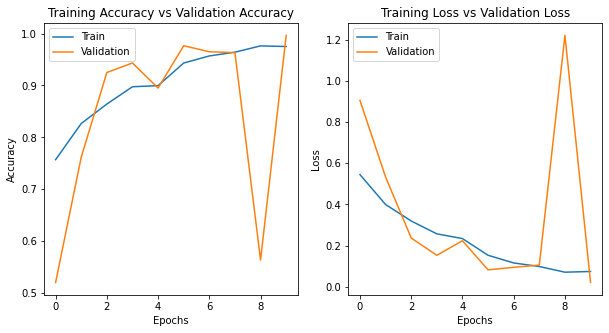

In [37]:
fig , ax = plt.subplots(1,2)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(10,5)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Train', 'Validation'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Train', 'Validation'], loc='best')


In [54]:
# Let's also show the numeric validation accuracy and loss.

score = model.evaluate(X_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.021581601351499557
Validation accuracy: 0.996666669845581


In [65]:
model.save('v1.h5')
model.save_weights('v1_weights.h5')